In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [214]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [215]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [216]:
#what we want to predict
predict = 'Chance of Admit '

In [217]:
data.shape

(500, 9)

In [218]:
#checking for nan values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [223]:
#droping the columns we don't need
data = data.drop(columns = ['Serial No.','University Rating'])

In [224]:
#setting X and y
X = data.drop([predict],1)
y = data[predict]

In [225]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [226]:
X.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,337,118,4.5,4.5,9.65,1
1,324,107,4.0,4.5,8.87,1
2,316,104,3.0,3.5,8.00,1
3,322,110,3.5,2.5,8.67,1
4,314,103,2.0,3.0,8.21,0


In [227]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [228]:
#creating the Linear Regression model
model = LinearRegression().fit(X_train, y_train)

In [247]:
#predicting values
prediction = model.predict(X_test)

In [230]:
#testing the accuracy of our model
accuracy = model.score(X_test, y_test)
round(accuracy*100,2)

82.02

In [231]:
#mean square error
mse = mean_squared_error(y_test, prediction)
mse

0.003471656353354373

In [259]:
#printing the original values and the predicted values
print('Linear Regression:')
for i in range(len(prediction[:10])):
    print(f'Prediction: {round(prediction[i],2)} -- Actual Chance of Admition: {data["Chance of Admit "][i]}')

Linear Regression:
Prediction: 0.66 -- Actual Chance of Admition: 0.92
Prediction: 0.7 -- Actual Chance of Admition: 0.76
Prediction: 0.94 -- Actual Chance of Admition: 0.72
Prediction: 0.74 -- Actual Chance of Admition: 0.8
Prediction: 0.82 -- Actual Chance of Admition: 0.65
Prediction: 0.67 -- Actual Chance of Admition: 0.9
Prediction: 0.75 -- Actual Chance of Admition: 0.75
Prediction: 0.72 -- Actual Chance of Admition: 0.68
Prediction: 0.79 -- Actual Chance of Admition: 0.5
Prediction: 0.66 -- Actual Chance of Admition: 0.45


In [233]:
#creating the KNN model
model_knn = KNeighborsRegressor(n_neighbors = 3).fit(X_train,y_train)

In [246]:
#predicting values
prediction_knn = model_knn.predict(X_test)

In [235]:
#testing the accuracy of our model
accuracy_knn = model_knn.score(X_test,y_test)
round(accuracy_knn*100,2)

71.12

In [276]:
#mean square error
mse = mean_squared_error(y_test, prediction_knn)
mse

0.005576333333333333

In [258]:
#printing the original values and the predicted values
print('KNeighbors Regressor:')
for i in range(len(prediction_knn[:10])):
    print(f'Prediction: {round(prediction_knn[i],2)} --  Actual Chance of Admition: {data["Chance of Admit "][i]}')

KNeighbors Regressor:
Prediction: 0.65 --  Actual Chance of Admition: 0.92
Prediction: 0.62 --  Actual Chance of Admition: 0.76
Prediction: 0.96 --  Actual Chance of Admition: 0.72
Prediction: 0.72 --  Actual Chance of Admition: 0.8
Prediction: 0.79 --  Actual Chance of Admition: 0.65
Prediction: 0.66 --  Actual Chance of Admition: 0.9
Prediction: 0.73 --  Actual Chance of Admition: 0.75
Prediction: 0.69 --  Actual Chance of Admition: 0.68
Prediction: 0.79 --  Actual Chance of Admition: 0.5
Prediction: 0.75 --  Actual Chance of Admition: 0.45


In [237]:
#creating the Logistic Regression model
model_dt = DecisionTreeRegressor(max_leaf_nodes = 15, random_state = 0).fit(X_train,y_train)

In [238]:
#predicting values
prediction_dt = model_dt.predict(X_test)

In [239]:
#testing the accuracy of our model
accuracy_dt = model_dt.score(X_test, y_test)
round(accuracy_dt*100,2)

73.77

In [277]:
#mean square error
mse = mean_squared_error(y_test, prediction_dt)
mse

0.005066179023531459

In [257]:
#printing the original values and the predicted values
print('Decision Tree Regressor:')
for i in range(len(prediction_dt[:10])):
    print(f'Prediction: {round(prediction_dt[i],2)} --  Actual Chance of Admition: {data["Chance of Admit "][i]}')

Decision Tree Regressor:
Prediction: 0.7 --  Actual Chance of Admition: 0.92
Prediction: 0.7 --  Actual Chance of Admition: 0.76
Prediction: 0.92 --  Actual Chance of Admition: 0.72
Prediction: 0.74 --  Actual Chance of Admition: 0.8
Prediction: 0.81 --  Actual Chance of Admition: 0.65
Prediction: 0.7 --  Actual Chance of Admition: 0.9
Prediction: 0.74 --  Actual Chance of Admition: 0.75
Prediction: 0.68 --  Actual Chance of Admition: 0.68
Prediction: 0.81 --  Actual Chance of Admition: 0.5
Prediction: 0.61 --  Actual Chance of Admition: 0.45


#### From the three models we tested, Linear Regression was the more accurate.

# Creating new prediction

In [241]:
data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4.5,4.5,9.65,1,0.92
1,324,107,4.0,4.5,8.87,1,0.76
2,316,104,3.0,3.5,8.00,1,0.72
3,322,110,3.5,2.5,8.67,1,0.80
4,314,103,2.0,3.0,8.21,0,0.65


In [254]:
new_prediction = [[337,118,4.5,4.5,9.65,1]]

In [255]:
new_lr = model.predict(new_prediction)
new_knn = model_knn.predict(new_prediction)
new_dt = model_dt.predict(new_prediction)

In [256]:
print(f'Linear Regression: {new_lr}')
print(f'KN Regressor: {new_knn}')
print(f'Decision Tree Regressor: {new_dt}')


Linear Regression: [0.95543983]
KN Regressor: [0.92666667]
Decision Tree Regressor: [0.92474576]


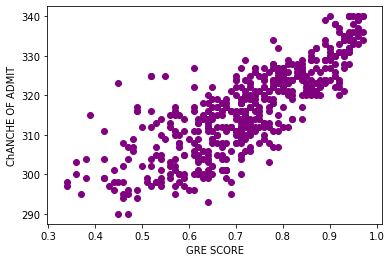

In [275]:
#graphing 
plt.scatter(data['Chance of Admit '], data['GRE Score'], color = 'purple')
plt.xlabel('GRE SCORE')
plt.ylabel('ChANCHE OF ADMIT')
plt.show()